# KLTracker

## Simple example

Bellow an example of how to run KLTracker

In [1]:
import sys
sys.path.append('../../allgo')

import allgo as ag
print(ag.__version__)
print(ag.__file__)

from PIL import Image
import numpy as np
import glob
import cv2

import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact_manual

import ntpath
from IPython.display import clear_output

0.2.0
../../allgo/allgo/__init__.py


## Load the data

In this section we load the data and display it in a interactive viewer

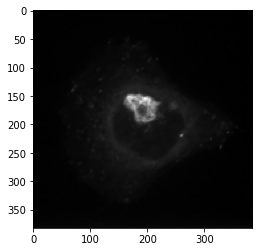

In [5]:
input_image_path = '../Data/hotspotdetection.tif'
input_image = imageio.imread(input_image_path)
plt.imshow(input_image,cmap = 'gist_gray')

## Connection to Allgo 

In [6]:
token = None # put your token.
client = ag.Client(token)
print("You have got a connexion to {}".format(client.allgo_url))

You have got a connexion to https://allgo18.inria.fr


## Interactive parameters selection

In [13]:
output_image = None

def run_kltracker(number, bits):
    global output_image

    input_basename = ntpath.basename(input_image_path)
    files = [ input_image_path ]
    params = '-nF ' + str(number) + ' -bits ' + str(bits)
    out_dict1 = client.run_job('Kltracker', files = files, params = params)
    job_id = out_dict1['id']
    url = out_dict1[str(job_id)][input_basename + '.output.tif.tif']
    print(out_dict1)
    print("job_id = ", job_id)
    
    outdir = '../Output'
    filepath = client.download_file(file_url = url, outdir = outdir , force = True)
    print(filepath)
    output_image = imageio.imread(filepath)

    clear_output()
    plt.figure(figsize = (10,80))
    plt.subplot(1, 2, 1)                      
    plt.imshow(input_image,cmap = "gist_gray")
    plt.subplot(1, 2, 2)
    plt.imshow(output_image)
    plt.show()
    
    
    
interact_manual(run_kltracker, number = (1, 200) , bits = (0,16, 8))


interactive(children=(IntSlider(value=100, description='number', max=200, min=1), IntSlider(value=8, descripti…

<function __main__.run_kltracker(number, bits)>

In [12]:
img = Image.open('../Output/hotspotdetection.tif.output.tif.tif')
imnp = np.array(img)

n = 1
while True:
    try:
        img.seek(n)
        img.save("../Video/frame_{}.tif".format(n))
        n = n+1
    except EOFError:
        break;

print("There are {} images in the sequence.".format(n))

images_array = []
for i in glob.glob('../Video/*.tif'):
    images=cv2.imread(i)
    height, width, layers = images.shape
    size = (width,height)
    images_array.append(images)

out = cv2.VideoWriter('../Video/project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 1, size)

for p in range(len(images_array)):
    out.write(images_array[p])
out.release()



cap = cv2.VideoCapture('../Video/project.avi')
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
 
    # Display the resulting frame
    cv2.imshow('Frame',frame)
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(100) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
cv2.destroyAllWindows()

print("You will find the video (project.avi) file in the 'serpico-notebooks/Vidéo' file.")

There are 30 images in the sequence.
You will find the video (project.avi) file in the 'serpico-notebooks/Vidéo' file.
